## About Dataset
- Among all industries, insurance domain has the largest use of analytics & data science methods. 
- This data set would provide you enough taste of working on data sets from insurance companies, what challenges are faced, what strategies are used, which variables influence the outcome etc. This is a classification problem. 
- The data has 615 rows and 13 columns.
### Problem-----
-  Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. 
- To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

##### Column Description 
- Loan_ID: Unique identifier for each loan application (618 unique values).
- Gender: Gender of the applicant (male/female/others).
- Married: Marital status of the applicant (yes/no).
- Dependents: Number of dependents of the applicant.
- Education: Education status of the applicant (graduate/non-graduate).
- Self_Employed: Employment status of the applicant (yes/no).
- ApplicantIncome: Income of the applicant in thousands.
- CoapplicantIncome: Income of the coapplicant (if any) in thousands.
- LoanAmount: The requested loan amount by the applicant.
- Loan_Amount_Term: The loan repayment term in months (possible values: 360, 60, 180).
- Credit_History: Applicant's credit history (Yes/No, where Yes indicates meeting loan guidelines).
- Property_Area: Area where the property is located (rural/urban/semiurban).
- Loan_Status: Loan approval status (Yes/No, indicating whether the applicant was approved for the loan or not).

### Data Analysis and Data Visualization 


In [39]:
import matplotlib.pyplot  as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [40]:
# loading the dataset to pandas DataFrame
loan_dataset = pd.read_csv('C:/Users/uswer/Downloads/LoanPrediction/Loan.csv')
loan_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [41]:
# printing the first 5 rows of the dataframe
loan_dataset.head()




,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [42]:
# number of rows and columns
loan_dataset.shape

(614, 13)

In [43]:
# statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Number of Approved Applicants By Education

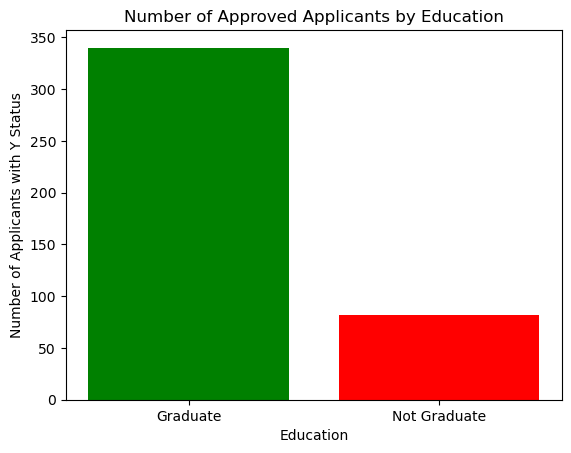

Total Number of Applications= 614
Number of Graduate Applicattion approved = 340
Number of Not Graduate Applicattion approved = 82


In [44]:
import matplotlib.pyplot as plt 
import pandas as pd
import matplotlib.pyplot as plt
graduate_approved = loan_dataset[(loan_dataset['Education'] == 'Graduate') & (loan_dataset['Loan_Status'] == 'Y')]
ungraduate_approved = loan_dataset[(loan_dataset['Education'] == 'Not Graduate') & (loan_dataset['Loan_Status'] == 'Y')]
total_applicants = len(graduate_approved) + len(ungraduate_approved)
graduate_count = len(graduate_approved)
ungraduate_count = len(ungraduate_approved)
categories = ['Graduate', 'Not Graduate']
counts = [graduate_count, ungraduate_count]
plt.bar(categories, counts, color=['green', 'red'])
plt.xlabel('Education')
plt.ylabel('Number of Applicants with Y Status')
plt.title('Number of Approved Applicants by Education')
plt.show()
print('Total Number of Applications=',+loan_dataset['Loan_ID'].count() )
print('Number of Graduate Applicattion approved =',+graduate_count)
print('Number of Not Graduate Applicattion approved =',+ungraduate_count)


## Number  of  Approved Applicants  By Gender 

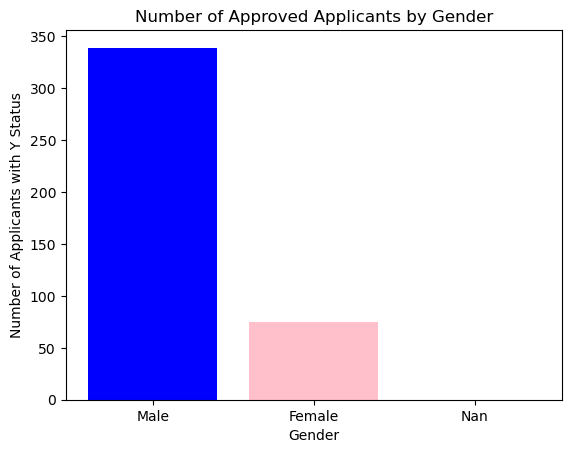

Number of Aproved Applicants by Male candidates = 339
Number of Aproved Applicants by Female candidates = 75


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
male_approved = loan_dataset[(loan_dataset['Gender'] == 'Male') & (loan_dataset['Loan_Status'] == 'Y')]
female_approved = loan_dataset[(loan_dataset['Gender'] == 'Female') & (loan_dataset['Loan_Status'] == 'Y')]
others_approved = loan_dataset[(loan_dataset['Gender'] == 'Nan') & (loan_dataset['Loan_Status'] == 'Y')]

# Calculate the total number of applicants in all categories.
total_applicants = len(male_approved) + len(female_approved) + len(others_approved)

# Calculate the number of approved applicants in each gender category.
male_count = len(male_approved)
female_count = len(female_approved)
others_count = len(others_approved)
categories = ['Male', 'Female', 'Nan']
counts = [male_count, female_count, others_count]
plt.bar(categories, counts, color=['blue', 'pink', 'gray'])
plt.xlabel('Gender')
plt.ylabel('Number of Applicants with Y Status')
plt.title('Number of Approved Applicants by Gender')
plt.show()
print("Number of Aproved Applicants by Male candidates =", +male_count )
print("Number of Aproved Applicants by Female candidates =", +female_count )


## Histogram of Applicant Income for Approved Applicants and Rejected Applicants 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


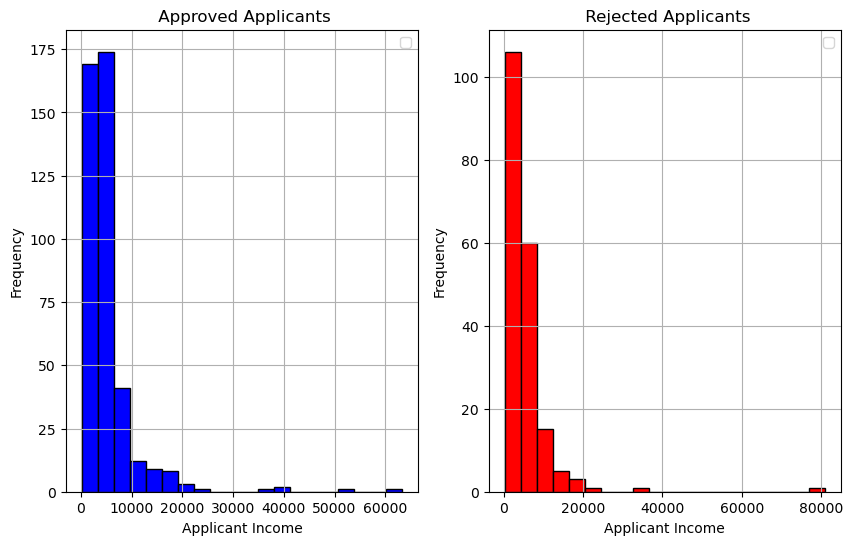

 Most of the loan_status will be  approved those who are having the income in the scale of 0-100000  
 Most of the loan_status will be  rejected those who are having the income in the scale of 0-200000  
it  means that loan status will not only majourly depend on the applicant_income


In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
approved_applicants = loan_dataset[loan_dataset['Loan_Status'] == 'Y']
applicant_income_y = approved_applicants['ApplicantIncome']
plt.hist(applicant_income_y, bins=20, color='blue', edgecolor='black')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title(' Approved Applicants')
plt.grid(True)
plt.legend()
plt.subplot(1,2,2)
rejected_applicants = loan_dataset[loan_dataset['Loan_Status'] == 'N']
applicant_income_y = rejected_applicants['ApplicantIncome']
plt.hist(applicant_income_y, bins=20, color='red', edgecolor='black')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title(' Rejected Applicants')
plt.grid(True)
plt.legend()
plt.show()
print(" Most of the loan_status will be  approved those who are having the income in the scale of 0-100000  ")
print(" Most of the loan_status will be  rejected those who are having the income in the scale of 0-200000  ")
print("it  means that loan status will not only majourly depend on the applicant_income")





##  Distribution of Approved Applicants by Dependents

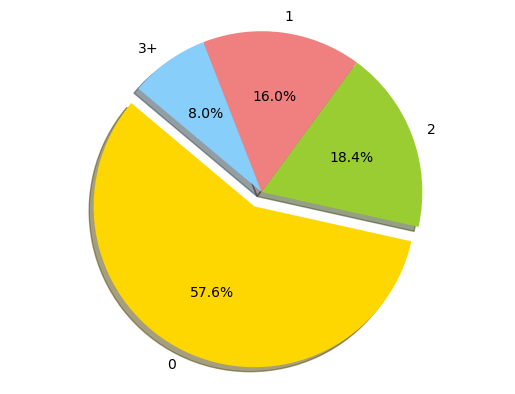

majority of the loan applications are approved those who are not having the any dependents 
that means loan number of dependets are effect on the loan_status if dependents are more then loan_status will be majorly  rejected


In [47]:
import matplotlib.pyplot as plt
approved_applicants = loan_dataset[loan_dataset['Loan_Status'] == 'Y']
dependents_counts = approved_applicants['Dependents'].value_counts()
labels = dependents_counts.index
sizes = dependents_counts.values
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal') 
plt.show()
print('majority of the loan applications are approved those who are not having the any dependents ')
print('that means loan number of dependets are effect on the loan_status if dependents are more then loan_status will be majorly  rejected')



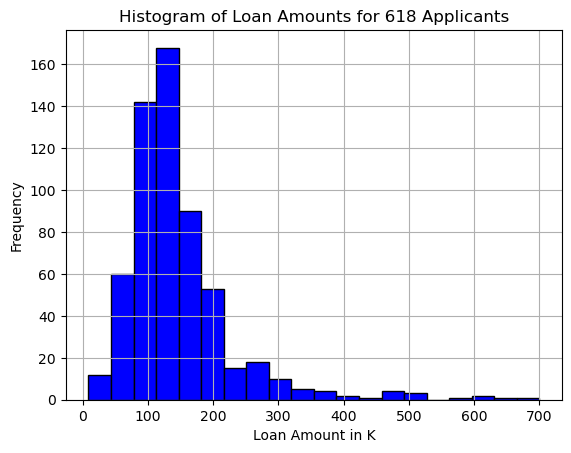

mejority of the loan applicant will appy the loan amount in the range of the 0K-200K


In [48]:
import matplotlib.pyplot as plt
loan_amounts = loan_dataset['LoanAmount']
plt.hist(loan_amounts, bins=20, color='blue', edgecolor='black')
plt.xlabel('Loan Amount in K')
plt.ylabel('Frequency')
plt.title('Histogram of Loan Amounts for 618 Applicants')
plt.grid(True)
plt.show()
print('mejority of the loan applicant will appy the loan amount in the range of the 0K-200K')


## Distribution of Approved Applicants by Property Area

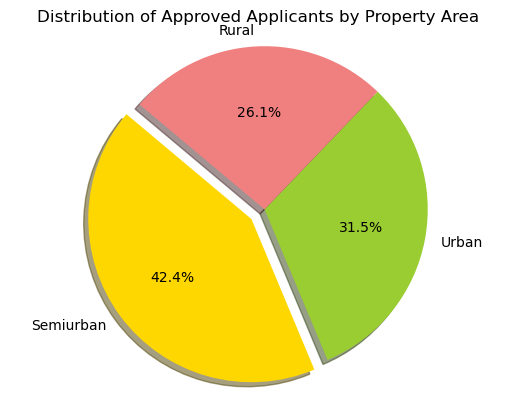

the most of the loan_status  will be approved to the  semiurban applicants 


In [49]:
import matplotlib.pyplot as plt
approved_applicants = loan_dataset[loan_dataset['Loan_Status'] == 'Y']
property_area_counts = approved_applicants['Property_Area'].value_counts()
labels = property_area_counts.index
sizes = property_area_counts.values
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  
plt.title('Distribution of Approved Applicants by Property Area')
plt.show()
print("the most of the loan_status  will be approved to the  semiurban applicants ")


## Data Preprocessing 

- Data preprocessing is a crucial step in the data analysis and machine learning pipeline.
-  It involves cleaning, transforming, and organizing raw data into a format that is suitable for analysis or machine learning model training.
- Proper data preprocessing can significantly impact the quality and effectiveness of your analysis or model.



###  Checking the null  values  and drop the entire row 

In [50]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [51]:
# dropping the missing values
loan_dataset = loan_dataset.dropna()


In [52]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Apply the Label  Encoding to the Different Categorical data Columns  

In [53]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
loan_dataset.loc[:,'Loan_Status']=LE.fit_transform(loan_dataset.loc[:,'Loan_Status'])
loan_dataset



C:\Users\uswer\AppData\Local\Temp\ipykernel_8432\4061406749.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_dataset.loc[:,'Loan_Status']=LE.fit_transform(loan_dataset.loc[:,'Loan_Status'])
C:\Users\uswer\AppData\Local\Temp\ipykernel_8432\4061406749.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  loan_dataset.loc[:,'Loan_Status']=LE.fit_transform(loan_dataset.loc[:,'Loan_Status'])


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [54]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
loan_dataset.loc[:,'Married']=LE.fit_transform(loan_dataset.loc[:,'Married'])
loan_dataset


C:\Users\uswer\AppData\Local\Temp\ipykernel_8432\2268144399.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_dataset.loc[:,'Married']=LE.fit_transform(loan_dataset.loc[:,'Married'])
C:\Users\uswer\AppData\Local\Temp\ipykernel_8432\2268144399.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  loan_dataset.loc[:,'Married']=LE.fit_transform(loan_dataset.loc[:,'Married'])


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,1,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,1,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,1,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,0,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,1,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,1,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,1,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [55]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
loan_dataset.loc[:,'Gender']=LE.fit_transform(loan_dataset.loc[:,'Gender'])
loan_dataset


C:\Users\uswer\AppData\Local\Temp\ipykernel_8432\3773482940.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_dataset.loc[:,'Gender']=LE.fit_transform(loan_dataset.loc[:,'Gender'])
C:\Users\uswer\AppData\Local\Temp\ipykernel_8432\3773482940.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  loan_dataset.loc[:,'Gender']=LE.fit_transform(loan_dataset.loc[:,'Gender'])


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1,1,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1,1,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1,0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,1,1,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,1,1,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,1,1,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,1,1,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [56]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
loan_dataset.loc[:,'Self_Employed']=LE.fit_transform(loan_dataset.loc[:,'Self_Employed'])
loan_dataset


C:\Users\uswer\AppData\Local\Temp\ipykernel_8432\158717091.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_dataset.loc[:,'Self_Employed']=LE.fit_transform(loan_dataset.loc[:,'Self_Employed'])
C:\Users\uswer\AppData\Local\Temp\ipykernel_8432\158717091.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  loan_dataset.loc[:,'Self_Employed']=LE.fit_transform(loan_dataset.loc[:,'Self_Employed'])


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,Graduate,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1,1,0,Graduate,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1,1,0,Not Graduate,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1,0,0,Graduate,0,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,1,1,2,Graduate,1,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,Graduate,0,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,1,1,3+,Graduate,0,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,1,1,1,Graduate,0,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,1,1,2,Graduate,0,7583,0.0,187.0,360.0,1.0,Urban,1


In [57]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
loan_dataset.loc[:,'Property_Area']=LE.fit_transform(loan_dataset.loc[:,'Property_Area'])
loan_dataset

C:\Users\uswer\AppData\Local\Temp\ipykernel_8432\1563859244.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_dataset.loc[:,'Property_Area']=LE.fit_transform(loan_dataset.loc[:,'Property_Area'])
C:\Users\uswer\AppData\Local\Temp\ipykernel_8432\1563859244.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  loan_dataset.loc[:,'Property_Area']=LE.fit_transform(loan_dataset.loc[:,'Property_Area'])


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,Graduate,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,Graduate,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,Not Graduate,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,Graduate,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,Graduate,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,Graduate,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3+,Graduate,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,Graduate,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,Graduate,0,7583,0.0,187.0,360.0,1.0,2,1


In [58]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
loan_dataset.loc[:,'Education']=LE.fit_transform(loan_dataset.loc[:,'Education'])
loan_dataset

C:\Users\uswer\AppData\Local\Temp\ipykernel_8432\1597270464.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_dataset.loc[:,'Education']=LE.fit_transform(loan_dataset.loc[:,'Education'])
C:\Users\uswer\AppData\Local\Temp\ipykernel_8432\1597270464.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  loan_dataset.loc[:,'Education']=LE.fit_transform(loan_dataset.loc[:,'Education'])


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3+,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


#### Split the Data into Input Data and Output data 

In [59]:

X = loan_dataset.drop(columns=['Loan_ID','Loan_Status','Dependents'],axis=1)
Y = loan_dataset['Loan_Status']

### Split the Data into  the Training and  Testing Data set 

In [60]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=0)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)


(384, 10) (96, 10) (384,) (96,)


In [61]:
ytest.value_counts()

1    61
0    35
Name: Loan_Status, dtype: int64

In [62]:
xtest

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
18,1,1,1,0,4887,0.0,133.0,360.0,1.0,0
161,1,1,0,0,7933,0.0,275.0,360.0,1.0,2
182,1,1,0,0,4600,0.0,73.0,180.0,1.0,1
340,1,1,1,0,2647,1587.0,173.0,360.0,1.0,0
216,1,1,0,0,150,1800.0,135.0,360.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...
532,1,0,0,0,3588,0.0,110.0,360.0,0.0,0
534,0,0,1,1,18165,0.0,125.0,360.0,1.0,2
142,1,0,0,1,6950,0.0,175.0,180.0,1.0,1
591,1,1,0,1,6000,0.0,205.0,240.0,1.0,1


### Build the model by using Logistic Regression  

In [63]:
#Build The Regrasssion model 
from sklearn.linear_model import LogisticRegression
LRC=LogisticRegression()
#default distance measure is euclidian as default value of p=2
LRC.fit(xtrain,ytrain)

LogisticRegression()

In [64]:
y_pred=LRC.predict(xtest)
y_pred #predicted the data     

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1])

In [65]:
ytest        #actual result 

18     0
161    0
182    1
340    0
216    0
      ..
532    0
534    1
142    1
591    0
243    1
Name: Loan_Status, Length: 96, dtype: int32

In [66]:
ytest.value_counts()

1    61
0    35
Name: Loan_Status, dtype: int64

In [67]:
xtest

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
18,1,1,1,0,4887,0.0,133.0,360.0,1.0,0
161,1,1,0,0,7933,0.0,275.0,360.0,1.0,2
182,1,1,0,0,4600,0.0,73.0,180.0,1.0,1
340,1,1,1,0,2647,1587.0,173.0,360.0,1.0,0
216,1,1,0,0,150,1800.0,135.0,360.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...
532,1,0,0,0,3588,0.0,110.0,360.0,0.0,0
534,0,0,1,1,18165,0.0,125.0,360.0,1.0,2
142,1,0,0,1,6950,0.0,175.0,180.0,1.0,1
591,1,1,0,1,6000,0.0,205.0,240.0,1.0,1


In [68]:
from sklearn.metrics import confusion_matrix
CM=confusion_matrix(y_pred,ytest)
CM

array([[12,  0],
       [23, 61]], dtype=int64)

In [69]:
Accuracy=np.sum(CM[0,0]+CM[1,1])/np.sum(CM)
print("accuracy=",Accuracy*100)


accuracy= 76.04166666666666


In [80]:
import pickle
pickle.dump(LRC, open("C:/Users/uswer/Desktop/LoanPrediction/LRC.pkl", 'wb'))









In [81]:
import pickle

# Specify the file path including the file name
file_path = "C:/Users/uswer/Desktop/LoanPrediction/LRC.pkl"

# Load the model from the file
with open(file_path, 'rb') as file:
    loaded_model = pickle.load(file)

# Now, 'loaded_model' contains the model you saved


In [84]:
loaded_model.predict(xtest)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1])